<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/An%C3%A1lise_de_Cluster_com_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANÁLISE DE CLUSTER COM MÉTODOS NÃO SUPERVISIONADOS**

# **Método Hierárquico**

## Instalando os pacotes necessários

In [65]:
pacotes <- c("tidyverse","cluster","dendextend","factoextra","fpc","gridExtra",
             "readxl","ggplot2","tibble")

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
    install.packages(instalador, dependencies = T)
    break()}
  sapply(pacotes, require, character = T) 
} else {
  sapply(pacotes, require, character = T) 
}

tidyverse    cluster dendextend factoextra        fpc  gridExtra     readxl 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
   ggplot2     tibble 
      TRUE       TRUE

## <u>ANÁLISE 1</u>: Cluster Hierárquico - McDonalds
> Verificar clusters de lanches do McDonalds para tomar uma decisaão estratégica sobre o futuro do marketing para a empresa.

In [66]:
mcdonalds <- read.table("MCDONALDS.csv", sep=";", dec=",", header = T)
mcdonalds <- mcdonalds %>% column_to_rownames("Lanche")
head(mcdonalds)

,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>
Big Mac,504,41,25,27,12.0,0.5,54,3.5,960,162,6.5
Big Tasty,843,45,41,55,24.0,1.7,104,5.1,1511,381,8.2
Quarterao,558,36,31,32,16.0,1.3,86,3.6,1216,275,10.0
Mcnifico Bacon,625,38,34,37,16.0,1.3,95,3.9,1255,209,11.0
Cheddar McMelt,507,33,29,29,14.0,1.2,81,2.9,819,199,10.0
McFish,373,38,18,16,5.8,0.4,43,2.2,773,168,3.8


### Padronizando os dados

In [67]:
mcdonalds.pad <- scale(mcdonalds)
head(mcdonalds.pad)

,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro
Big Mac,0.05977885,-0.0386353,-0.2216277,0.2263718,0.4854431,-0.1781447,-0.2032002,-0.14652353,-0.5362036,0.1322864,0.7573811
Big Tasty,2.03878557,0.3906458,1.1635455,2.4613539,2.3359249,2.0486641,1.2079123,0.76924856,0.9807824,2.8048623,1.3404041
Quarterao,0.37501885,-0.5752367,0.2978122,0.6254757,1.1022703,1.3063945,0.6999118,-0.08928778,0.1686029,1.5112868,1.9577226
Mcnifico Bacon,0.76614998,-0.3605961,0.5575322,1.0245797,1.1022703,1.3063945,0.9539121,0.08241949,0.2759758,0.7058529,2.3006773
Cheddar McMelt,0.07729218,-0.8971975,0.1246656,0.3860133,0.7938567,1.1208271,0.5588006,-0.48993807,-0.9243978,0.5838175,1.9577226
McFish,-0.70497006,-0.3605961,-0.8276410,-0.6516569,-0.4706392,-0.3637121,-0.5136450,-0.89058836,-1.0510428,0.2055077,-0.1685965


### Clusterizando os sanduíches

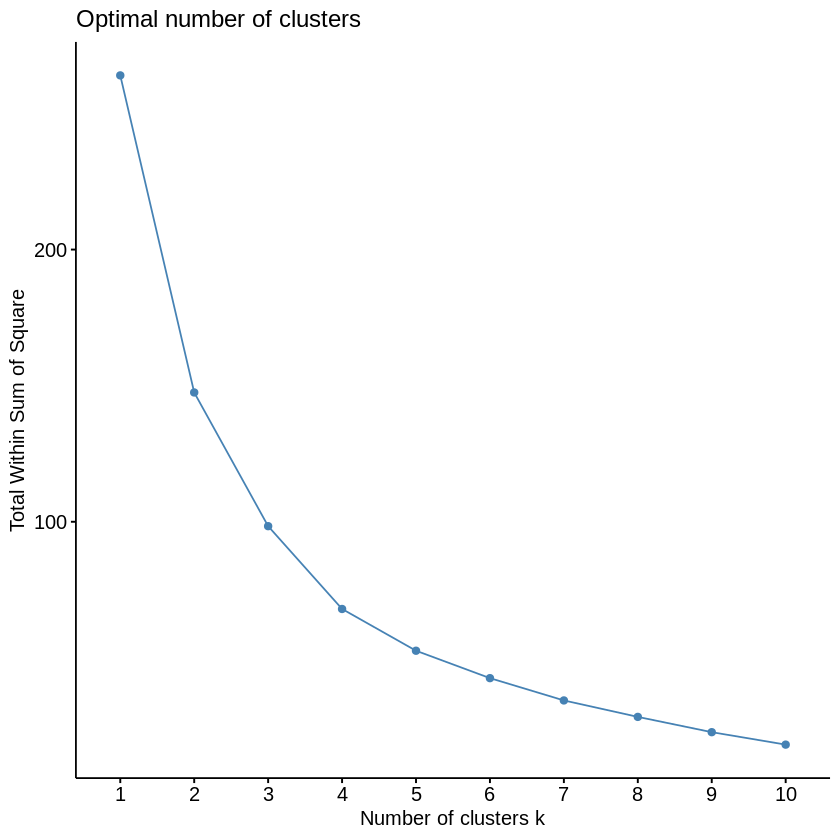

In [68]:
# Método ELBOW para verificar a variabilidade com quantidades diferentes de grupos
fviz_nbclust(mcdonalds.pad, FUN = hcut, method = "wss" )

In [69]:
distancia <- dist(mcdonalds.pad, method = "euclidian")

# Verificando algumas possibilidades de clusters com métodos diferentes
clust_hierarq_1 <- hclust(distancia, method = "single")
clust_hierarq_2 <- hclust(distancia, method = "complet")
clust_hierarq_3 <- hclust(distancia, method = "average")
clust_hierarq_4 <- hclust(distancia, method = "ward.D")

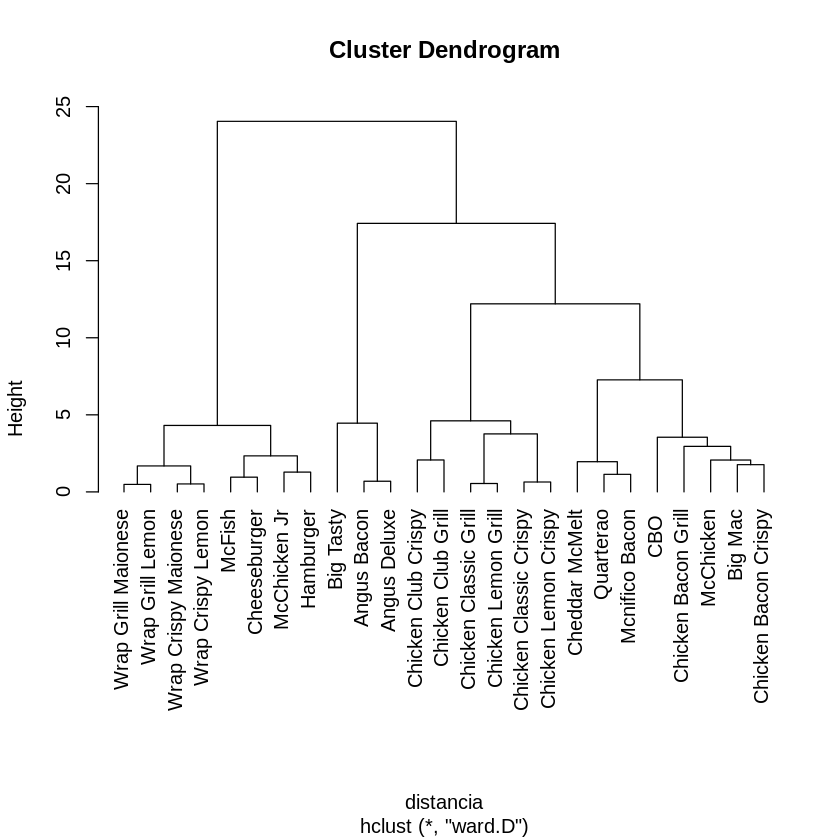

In [70]:
# Plotagens
# g1 <- plot(clust_hierarq_1)
# g2 <- plot(clust_hierarq_2)
# g3 <- plot(clust_hierarq_3)
g4 <- plot(clust_hierarq_4, hang = -2, cex = 1)

### Comparando os métodos

In [71]:
# Fazendo os dendogramas para verificar as distâncias 
dend.1 <- as.dendrogram(clust_hierarq_1)
dend.2 <- as.dendrogram(clust_hierarq_2)
dend.3 <- as.dendrogram(clust_hierarq_3)
dend.4 <- as.dendrogram(clust_hierarq_4)

[[1]]
'dendrogram' with 2 branches and 25 members total, at height 3.612392 

[[2]]
'dendrogram' with 2 branches and 25 members total, at height 24.04407 

attr(,"class")
[1] "dendlist"

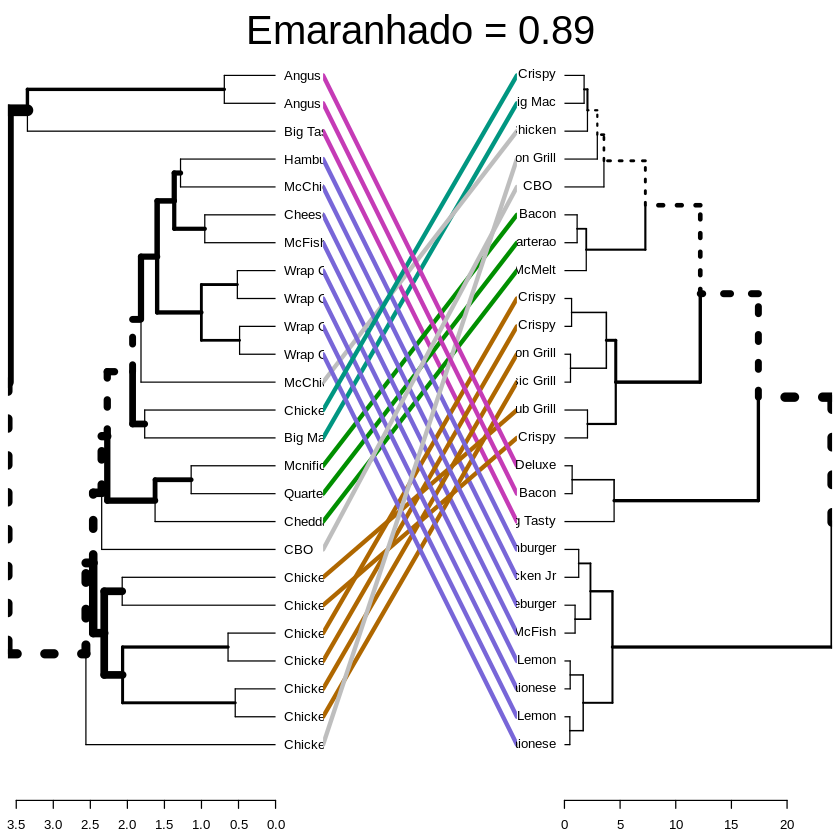

In [72]:
dend_list <- dendlist(dend.1, dend.4)
dend_list
tanglegram(dend.1, dend.4, main = paste("Emaranhado =", round(entanglement(dend_list), 2)))

Escolhi o método <b>ward.D</b> para clusterização da base de dados com 5 grupos

In [73]:
grupos <- cutree(clust_hierarq_4, k = 4)
mcdonalds_clusterizado <- cbind(mcdonalds, grupos)
head(mcdonalds_clusterizado)

,Valor.Energetico,Carboidratos,Proteinas,Gorduras.Totais,Gorduras.Saturadas,Gorduras.Trans,Colesterol,Fibra.Alimentar,Sodio,Calcio,Ferro,grupos
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>
Big Mac,504,41,25,27,12.0,0.5,54,3.5,960,162,6.5,1
Big Tasty,843,45,41,55,24.0,1.7,104,5.1,1511,381,8.2,2
Quarterao,558,36,31,32,16.0,1.3,86,3.6,1216,275,10.0,1
Mcnifico Bacon,625,38,34,37,16.0,1.3,95,3.9,1255,209,11.0,1
Cheddar McMelt,507,33,29,29,14.0,1.2,81,2.9,819,199,10.0,1
McFish,373,38,18,16,5.8,0.4,43,2.2,773,168,3.8,3
